# Mount the drive for experiments

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

URL_path = "/content/drive/MyDrive/Code/Data_science_Turing_college/Colabs/14_002_NLP/dataset/train.csv"

Mounted at /content/drive


# Instalation of modules

In [2]:
!pip install emoji wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.6 MB/s eta 0:00:00


# import the modules

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Text processing and tokenization
from transformers import PreTrainedTokenizer, BertTokenizer, DistilBertTokenizer
from transformers import BertModel, DistilBertModel
import emoji
from typing import List

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objs as go

# Machine learning and dimensionality reduction
from sklearn.decomposition import PCA
import torch



# print the whole line
pd.set_option('display.max_colwidth', None)

# colorama of the charts
custom_colors = ['#36CE8A', "#7436F5","#3736F4",   "#36AEF5", "#B336F5", "#f8165e", "#36709A",  "#3672F5", "#7ACE5D"]
gradient_colors = [ "#36CE8A", '#7436F5']
color_palette_custom  = sns.set_palette(custom_colors)
theme_color = sns.color_palette(color_palette_custom, 9)
cmap_theme = LinearSegmentedColormap.from_list('custom_colormap', gradient_colors)
theme_color

[(0.21176470588235294, 0.807843137254902, 0.5411764705882353),
 (0.4549019607843137, 0.21176470588235294, 0.9607843137254902),
 (0.21568627450980393, 0.21176470588235294, 0.9568627450980393),
 (0.21176470588235294, 0.6823529411764706, 0.9607843137254902),
 (0.7019607843137254, 0.21176470588235294, 0.9607843137254902),
 (0.9725490196078431, 0.08627450980392157, 0.3686274509803922),
 (0.21176470588235294, 0.4392156862745098, 0.6039215686274509),
 (0.21176470588235294, 0.4470588235294118, 0.9607843137254902),
 (0.47843137254901963, 0.807843137254902, 0.36470588235294116)]

In [4]:
dataframe_import = pd.read_csv(URL_path)
dataframe_import = dataframe_import.drop(columns="id")
dataframe_import.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


# Some data cleaning
We will be taking out the spaces, also taking out the rows that had URL or any kind of HTML and finally we will be modifying the emoji into words so the model understand better whats happening.

In [5]:
print(f"total of rows {dataframe_import.shape}")

# delete spaces
dataframe_import["comment_text"] = dataframe_import["comment_text"].str.replace("\n", "", regex=False)
dataframe_import.head()

# delete urls
pattern = r"<[^>]+>|https?://\S+|www\.\S+"
dataframe_import = dataframe_import[~dataframe_import["comment_text"].str.contains(pattern, na=False, regex=True)]
print(f"delete the url or html rows {dataframe_import.shape}")

# convert emoji to words
def convert_emojis_to_words(text):
    return emoji.demojize(text)
dataframe_import['comment_text'] = dataframe_import['comment_text'].apply(convert_emojis_to_words)
print(f"change the emoji to words {dataframe_import.shape}")

filtered_rows = dataframe_import[dataframe_import['comment_text'].str.len() <= 512]
print(f"filter the characters below 512 {dataframe_import.shape}")

URL_export_path = "/content/drive/MyDrive/Code/Data_science_Turing_college/Colabs/14_002_NLP/dataset/clean_dataset.csv"
dataframe_import.to_csv(URL_export_path, index=False)

dataframe_import.head()

total of rows (159571, 7)
delete the url or html rows (154401, 7)
change the emoji to words (154401, 7)
filter the characters below 512 (154401, 7)


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"ExplanationWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""MoreI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


We will recheck the dataset's balance to determine whether the proportions remain consistent or if we can identify any changes.

In [6]:
def proportion_balance_classes(names: pd.Index, values: np.ndarray) -> None:
    """We plot the proportion of each class in each row."""

    plt.figure(figsize=(15, 4))
    ax = sns.barplot(x=names, y=values, alpha=0.8)
    plt.title("# per class")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('Type', fontsize=12)

    rects = ax.patches
    for rect, label in zip(rects, values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{label:.2f}', ha='center', va='bottom')

    plt.show()

    return

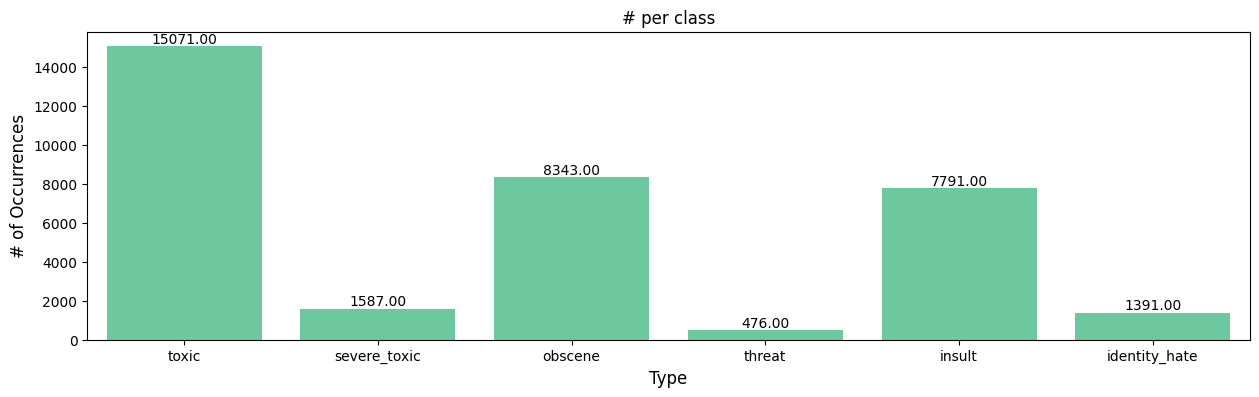

In [7]:
target_y =dataframe_import.iloc[:,1:].sum()
proportion_balance_classes(target_y.index, target_y.values)

If we compare the values we are not missing to much of the values when deleting the rows so we will continue with the process.

# Word cloud

We will try to plot the word clouds to understand whats happening between each of the target variables

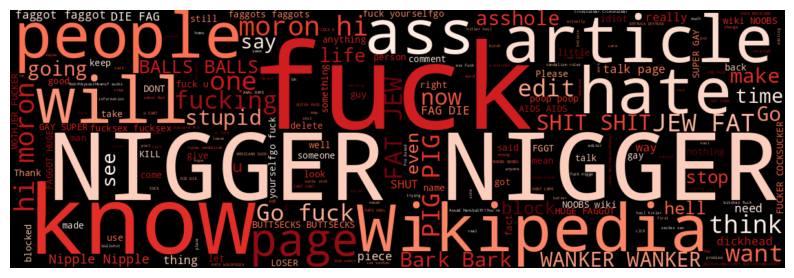

In [8]:
filtered_df = dataframe_import[dataframe_import['toxic'] == 1]
toxic_comments_text = " ".join(filtered_df['comment_text'].astype(str))

# Display the word cloud
wordcloud = WordCloud(width=1200, height=400, background_color="black", colormap="Reds").generate(toxic_comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Clearly we could see some words in **toxic** that can clasified as offensive, words like:
Fuck, Nigger, Jew and Fat

to name a few so the model can try to got those word to get some interpretability

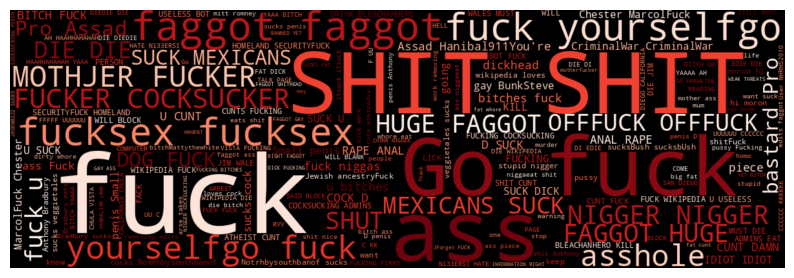

In [9]:
filtered_df = dataframe_import[dataframe_import['severe_toxic'] == 1]
toxic_comments_text = " ".join(filtered_df['comment_text'].astype(str))

# Display the word cloud
wordcloud = WordCloud(width=1200, height=400, background_color="black", colormap="Reds").generate(toxic_comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In this case we also find somoe offensive word that look like the other step. but in this case seems more offensive in the target called **severe_toxic**

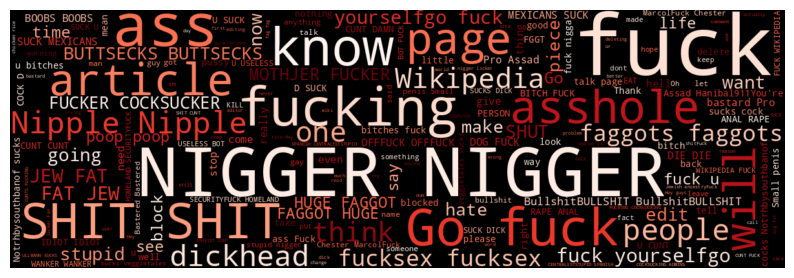

In [10]:
filtered_df = dataframe_import[dataframe_import['obscene'] == 1]
toxic_comments_text = " ".join(filtered_df['comment_text'].astype(str))

# Display the word cloud
wordcloud = WordCloud(width=1200, height=400, background_color="black", colormap="Reds").generate(toxic_comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In this case you found more sexual words that can be complilty **obscene**

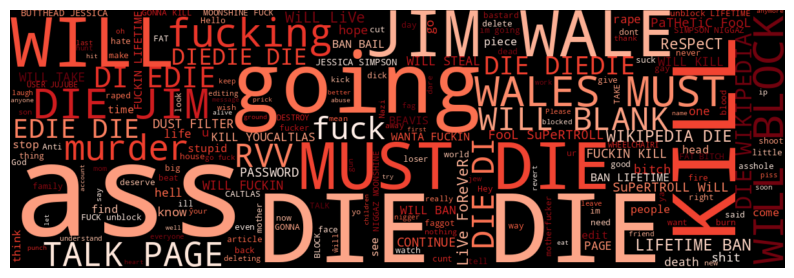

In [11]:
filtered_df = dataframe_import[dataframe_import['threat'] == 1]
toxic_comments_text = " ".join(filtered_df['comment_text'].astype(str))

# Display the word cloud
wordcloud = WordCloud(width=1200, height=400, background_color="black", colormap="Reds").generate(toxic_comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In the threat feature we found words more about murdering someone, so we could see some specifc words for that but also we keep finding anomalies like wikipedia.

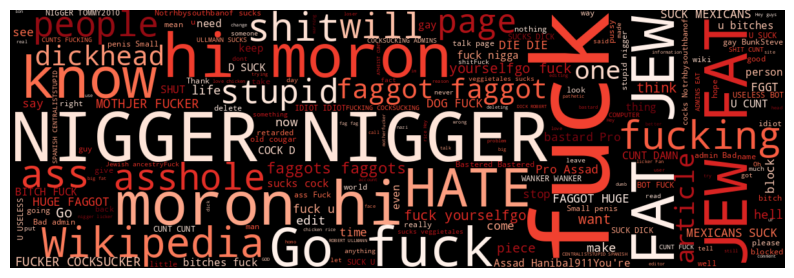

In [12]:
filtered_df = dataframe_import[dataframe_import['insult'] == 1]
toxic_comments_text = " ".join(filtered_df['comment_text'].astype(str))

# Display the word cloud
wordcloud = WordCloud(width=1200, height=400, background_color="black", colormap="Reds").generate(toxic_comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In the target **insult** we found more words that could be more classified as an insult, but we keep seeing some anomalys like wikipedia or hi to name a few

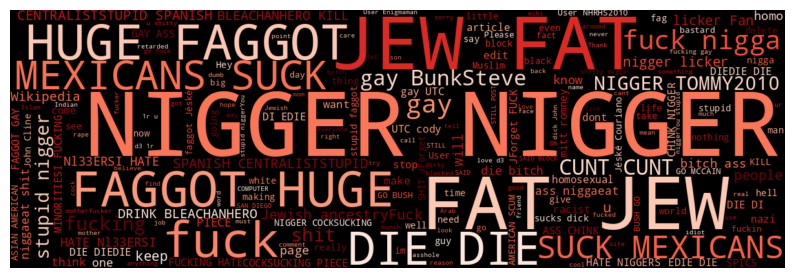

In [13]:
filtered_df = dataframe_import[dataframe_import['identity_hate'] == 1]
toxic_comments_text = " ".join(filtered_df['comment_text'].astype(str))

# Display the word cloud
wordcloud = WordCloud(width=1200, height=400, background_color="black", colormap="Reds").generate(toxic_comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In here we found more word about their identity, race or religion, that can help us undersand how to find the, butalso there are some words like Tommy 2010 that does not had anyhing to do with that maybe.

The overall summary of the wordsclouds its that we could found some really hatefully words and can make us understand when we could find thiskind of comments

# Count the characters
With this we could find any possible weird words or characters to see if all the words are in the same language.

In [14]:
column_titles = ''.join(dataframe_import["comment_text"])
character_counts = Counter(column_titles)
char_counts_df = pd.DataFrame(character_counts.items(), columns=['character', 'count'])
char_counts_df = char_counts_df.sort_values(by='count', ascending=False)
print(char_counts_df.shape)
char_counts_df.tail()

(2187, 2)


,character,count
817,信,1
1628,ș,1
1630,짐,1
1632,찜,1
2186,ピ,1


We see that we had
Now we will be printing all the values to understand which values we had

In [15]:
for value in char_counts_df["character"]:
    print(value)

 
e
t
a
o
i
n
s
r
h
l
d
u
c
m
y
p
g
f
w
b
.
k
v
,
I
"
T
'
A
S
W
C
E
P
O
!
N
H
R
-
M
1
0
)
B
:
x
D
(
U
F
L
2
Y
j
?
G
K
q
z
J
9
3
5
4
V
8
6
7
=
/
;
|
_
]
~
[
 
{
—
}
•
#
Q
*
Z
X
%
’
&
–
+
“
”
@
·
>
é
$
^
→
‎
\
´
`
а
‘
о
á
е
и
…
<
ا
ü
ö
í
н
α
ل
р
т
ı
ó
с
←
ä
к
ć
л
ā
в
►
ε
τ
م
§
♫
°
у
д
ç
ο
و
š
»
ي
★
ς
п
ن
«
λ
ر
м
♪
ι
ν
ş
η
ب
†
ρ
è
≈
æ
ع
−
č
¡
ō
à
ه
б
â
்
å
ω
ñ
ə
ú
ū
ø
ت
π
¢
​
د
∆
σ
ţ
я
κ
∇
з
º
ë
β
μ
ь
¯
г
ß
☼
й
£
س
×
ł
━
ί
र
י
ğ
Ε
्
ة
Ω
Α
ा
¿
ã
─
═
Я
竜
ê
ј
ك
¦
ɐ
δ
や
ś
ī
ˈ
É
γ
υ
С
ά
ו
Δ
ይ
ق
Ø
ف
ר
ج
أ
₪
☏
²
ы
✎
ж
ï
Μ
⇔
𒁳
◕
ح
ð
±
ч
ɪ
｡
≠
ה
⇒
ش
ń
ž
€
ン
✄
Ö
ம
ô
話
х
國
і
ý
М
Æ
Š
­
⋅
い
म
―
水
ि
☆
ό
¨
 
க
ш
ی
ת
Κ
מ
№
χ
Ç
В
連
，
見
Σ
学
龙
☥
स
┃
ż
φ
ל
न
ă
א
İ
 
И
∞
絡
雲
迷
惑
Á
،
Č
ц
ز
ி
ு
聖
ŷ
າ
ש
╟
╢
ě
Å
ं
ᛏ
ע
ב
ው
ት
⟲
த
خ
ģ
ص
¤
百
✽
त
☻
⊕
ɛ
ṣ
ё
ю
ह
➨
ṗ
П
î
Ο
ˌ
琉
ŵ
ط
‿
А
‍
œ
К
人
Ψ
・
ṃ
ṛ
क
θ
ी
Œ
ɹ


ष
Ś
¶
ʌ
ர
中
े
′
の
ξ
て
إ
。
द
வ
Λ
נ
⁂
ட
ג
会
Ó
έ
ー
ː
³
ற
你
„
ї
し
đ
ζ
ذ
Τ
ʍ
Ρ
⁠
ˉ
Д
ė
Ş
Đ
∴
ם
ल
¬
ʕ
व
ъ
さ
غ
Θ
Π
ா
稿
科
「
」
Γ
Т
ד
Υ
ى
投
 
‏
ⱷ
₭
ث
ṇ
≤
ē
☭
ח
ˡ
ɑ
ř
µ
⁄
討
Б
文
論
ύ
と
ή
└
♬
✆
山
❞
ɔ
❝
ò
�
ல
ப
щ

͡
ラ
Ν
ु
┐


I will be plotting some comments that use weird characters to understand whats happening.

In [16]:
# Some comentaries to see whats happening with the characters
filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("邈", na=False)]
print(f'Comentary ===  {filtered_rows["comment_text"]}')

filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("🙊", na=False)]
print(f'Comentary ===  {filtered_rows["comment_text"]}')

filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("ǜ", na=False)]
print(f'Comentary ===  {filtered_rows["comment_text"]}')

filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("औ", na=False)]
print(f'Comentary ===  {filtered_rows["comment_text"]}')

filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("💩", na=False)]
print(f'Comentary ===  {filtered_rows["comment_text"]}')

filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("æ", na=False)]
print(f'Comentary ===  {filtered_rows["comment_text"]}')

Comentary ===  44897    Book point. (  )Lu Bu of Book of Later Han三國志/卷07 吕布, 张邈, 陈登, 臧洪  contains Lu Bu, Zhang Miao, [Chen Deng]], Zang Hong of the Book of the Three Kingdoms後漢書/卷75 劉焉袁術吕布列傳 DOES NOT contains 劉焉, 袁術(Yuan Shu), 吕布(Lu Bu) of Book of the Later Han. (WARNING zh.wikisource.org/wiki contains wrong content. 75 contains 74).Anyway I'd like remind you that biography of Lu Bu exsist both at Records of the Three Kingdoms and at Book of the Later Han. However the biograpy atBook of the later Han is longer than that of Book of 3k. Interestingly Record of the Three Kingdoms was said to covers 184 to 280, while Book of the Later Han said to cover from 6? to 189. Lu Bu lived 155(?) to 199. Why could Book of Later Han, which contains more detailed biography of Lu Bu, NOT be said to cover 6(?) to 200 or 220? (  )
Name: comment_text, dtype: object
Comentary ===  Series([], Name: comment_text, dtype: object)
Comentary ===  126    Ahh, Hello Witzeman 203.92.84.161  Symbols: ~ | ¡ ¿ † ‡ :l

In [17]:
filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("п", na=False)]
filtered_rows["comment_text"].head()

126     Ahh, Hello Witzeman 203.92.84.161  Symbols: ~ | ¡ ¿ † ‡ :left-right_arrow: ↑ ↓ • ¶   # ½ ⅓ ⅔ ¼ ¾ ⅛ ⅜ ⅝ ⅞ ∞   ‘ “ ’ ” «»   ¤ ₳ ฿ ₵ ¢ ₡ ₢ $ ₫ ₯ € ₠ ₣ ƒ ₴ ₭ ₤ ℳ ₥ ₦ № ₧ ₰ £ ៛ ₨ ₪ ৳ ₮ ₩ ¥   :spade_suit: :club_suit: :heart_suit: :diamond_suit:   m² m³ Characters: Á á Ć ć É é Í í Ĺ ĺ Ń ń Ó ó Ŕ ŕ Ś ś Ú ú Ý ý Ź ź   À à È è Ì ì Ò ò Ù ù   Â â Ĉ ĉ Ê ê Ĝ ĝ Ĥ ĥ Î î Ĵ ĵ Ô ô Ŝ ŝ Û û Ŵ ŵ Ŷ ŷ   Ä ä Ë ë Ï ï Ö ö Ü ü Ÿ ÿ   ß   Ã ã Ẽ ẽ Ĩ ĩ Ñ ñ Õ õ Ũ ũ Ỹ ỹ   Ç ç Ģ ģ Ķ ķ Ļ ļ Ņ ņ Ŗ ŗ Ş ş Ţ ţ   Đ đ   Ů ů   Ǎ ǎ Č č Ď ď Ě ě Ǐ ǐ Ľ ľ Ň ň Ǒ ǒ Ř ř Š š Ť ť Ǔ ǔ Ž ž   Ā ā Ē ē Ī ī Ō ō Ū ū Ȳ ȳ Ǣ ǣ   ǖ ǘ ǚ ǜ Ă ă Ĕ ĕ Ğ ğ Ĭ ĭ Ŏ ŏ Ŭ ŭ   Ċ ċ Ė ė Ġ ġ İ ı Ż ż   Ą ą Ę ę Į į Ǫ ǫ Ų ų   Ḍ ḍ Ḥ ḥ Ḷ ḷ Ḹ ḹ Ṃ ṃ Ṇ ṇ Ṛ ṛ Ṝ ṝ Ṣ ṣ Ṭ ṭ   Ł ł   Ő ő Ű ű   Ŀ ŀ   Ħ ħ   Ð ð Þ þ   Œ œ   Æ æ Ø ø Å å   Ə ə    Greek: Ά ά Έ έ Ή ή Ί ί Ό ό Ύ ύ Ώ ώ   Α α Β β Γ γ Δ δ   Ε ε Ζ ζ Η η Θ θ   Ι ι Κ κ Λ λ Μ μ   Ν ν Ξ ξ Ο ο Π π   Ρ ρ Σ σ ς Τ τ Υ υ   Φ φ Χ χ Ψ ψ Ω ω    Cyrillic: А а Б б В в Г г   Ґ ґ Ѓ ѓ Д д Ђ ђ   Е е Ё ё Є є Ж ж   З з Ѕ ѕ И и І і   Ї ї Й й Ј ј К к   Ќ ќ Л л Љ љ М м   Н н Њ њ О о П п   Р р С с Т т Ћ ћ   У у Ў ў Ф ф Х х   Ц ц Ч ч Џ џ Ш ш   Щ щ Ъ ъ Ы ы Ь ь   Э э Ю ю Я я IPA: t̪ d̪ ʈ ɖ ɟ ɡ ɢ ʡ ʔ   ɸ ʃ ʒ ɕ ʑ ʂ ʐ ʝ ɣ ʁ ʕ ʜ ʢ ɦ   ɱ ɳ ɲ ŋ ɴ   ʋ ɹ ɻ ɰ   ʙ ʀ ɾ ɽ   ɫ ɬ ɮ ɺ ɭ ʎ ʟ   ɥ ʍ ɧ   ɓ ɗ ʄ ɠ ʛ   ʘ ǀ ǃ ǂ ǁ   ɨ ʉ ɯ   ɪ ʏ ʊ   ɘ ɵ ɤ   ə ɚ   ɛ ɜ ɝ ɞ ʌ ɔ   ɐ ɶ ɑ ɒ   ʰ ʷ ʲ ˠ ˤ ⁿ ˡ   ˈ ˌ ː ˑ ̪   = My Famous Article ==witze  happiness − wikipedia The Witzeman is a great honour that has been passed down through the generations of many families, regardless of race, age, character or knowledge. The outside world knows little about these elusive characters, and the honour of the Witzeman. For those who have ever been a Witzeman, it has been said to have been a great honour, although the qualities needed for the job have never been disclosed. A person may not now they were a Witzeman for many years, until they are called by former Witzemans via dreams. Associates of the Witzeman are known to be a certain Babe Cool or the much lesser known Witzewoman.The Present Witzeman is an 11-year-old boy namely Benjamin Woods, who is said to have become a Witzeman after he felt this 'awesome radiance in his top-right bumcheek'. He has not told a great number of people his testimony, but has promised to do so in years to come.                           HistoryThe present world has only come enlightned with the knowledge of the Witzeman in present years, because former Witzemen have not been so public about the honour, to abide with the formality and conservativism in their time. The term 'Witzeman' is a compound word of the adjective Witze and 'man', witze being an 11th century term for 'a person of extreme humour and radiant intelligence'. Unfortuneatly, Witze is also sometimes associated with bad wind, for unspeakable reasons.                       Proper HistoryAs early as the 14th century, Witzemen were considered outcasts, and young children were encouraged to poke them with sticks. This led to the 1st Witzeman Rebellion of 1555 when the current Witzeman and his followers attempted a coup to take over the local Council chess team. This rebellion further disgraced the Witzeman, as he and his followers were embarassingly pronounced 'gaga' at a Government meeting that year. The period from here to the early 1900s was a dark time in the Witzemans history. However good times were to come for the Witzeman. Many normal people took part in mass demonstrations and protests for the Witzeman in the 1980s, building up to a great moment in the history...the Great Rebellion of 1988. This was when several Witzeman sprinted round the Visitors Gallery of the House of Commons, wearing clown masks, but otherwise completely naked. This was thought to be an act of circambulation. However many people who witnessed this shocking behaviour, were 'mentally, spiritually, and emotionallly scarred for life'. This group of people included many young children who were forced to go to asylums in a state of mental instability, suffering fr

In [18]:
filtered_rows = dataframe_import[dataframe_import["comment_text"].str.contains("и", na=False)]
filtered_rows["comment_text"].head()

126     Ahh, Hello Witzeman 203.92.84.161  Symbols: ~ | ¡ ¿ † ‡ :left-right_arrow: ↑ ↓ • ¶   # ½ ⅓ ⅔ ¼ ¾ ⅛ ⅜ ⅝ ⅞ ∞   ‘ “ ’ ” «»   ¤ ₳ ฿ ₵ ¢ ₡ ₢ $ ₫ ₯ € ₠ ₣ ƒ ₴ ₭ ₤ ℳ ₥ ₦ № ₧ ₰ £ ៛ ₨ ₪ ৳ ₮ ₩ ¥   :spade_suit: :club_suit: :heart_suit: :diamond_suit:   m² m³ Characters: Á á Ć ć É é Í í Ĺ ĺ Ń ń Ó ó Ŕ ŕ Ś ś Ú ú Ý ý Ź ź   À à È è Ì ì Ò ò Ù ù   Â â Ĉ ĉ Ê ê Ĝ ĝ Ĥ ĥ Î î Ĵ ĵ Ô ô Ŝ ŝ Û û Ŵ ŵ Ŷ ŷ   Ä ä Ë ë Ï ï Ö ö Ü ü Ÿ ÿ   ß   Ã ã Ẽ ẽ Ĩ ĩ Ñ ñ Õ õ Ũ ũ Ỹ ỹ   Ç ç Ģ ģ Ķ ķ Ļ ļ Ņ ņ Ŗ ŗ Ş ş Ţ ţ   Đ đ   Ů ů   Ǎ ǎ Č č Ď ď Ě ě Ǐ ǐ Ľ ľ Ň ň Ǒ ǒ Ř ř Š š Ť ť Ǔ ǔ Ž ž   Ā ā Ē ē Ī ī Ō ō Ū ū Ȳ ȳ Ǣ ǣ   ǖ ǘ ǚ ǜ Ă ă Ĕ ĕ Ğ ğ Ĭ ĭ Ŏ ŏ Ŭ ŭ   Ċ ċ Ė ė Ġ ġ İ ı Ż ż   Ą ą Ę ę Į į Ǫ ǫ Ų ų   Ḍ ḍ Ḥ ḥ Ḷ ḷ Ḹ ḹ Ṃ ṃ Ṇ ṇ Ṛ ṛ Ṝ ṝ Ṣ ṣ Ṭ ṭ   Ł ł   Ő ő Ű ű   Ŀ ŀ   Ħ ħ   Ð ð Þ þ   Œ œ   Æ æ Ø ø Å å   Ə ə    Greek: Ά ά Έ έ Ή ή Ί ί Ό ό Ύ ύ Ώ ώ   Α α Β β Γ γ Δ δ   Ε ε Ζ ζ Η η Θ θ   Ι ι Κ κ Λ λ Μ μ   Ν ν Ξ ξ Ο ο Π π   Ρ ρ Σ σ ς Τ τ Υ υ   Φ φ Χ χ Ψ ψ Ω ω    Cyrillic: А а Б б В в Г г   Ґ ґ Ѓ ѓ Д д Ђ ђ   Е е Ё ё Є є Ж ж   З з Ѕ ѕ И и І і   Ї ї Й й Ј ј К к   Ќ ќ Л л Љ љ М м   Н н Њ њ О о П п   Р р С с Т т Ћ ћ   У у Ў ў Ф ф Х х   Ц ц Ч ч Џ џ Ш ш   Щ щ Ъ ъ Ы ы Ь ь   Э э Ю ю Я я IPA: t̪ d̪ ʈ ɖ ɟ ɡ ɢ ʡ ʔ   ɸ ʃ ʒ ɕ ʑ ʂ ʐ ʝ ɣ ʁ ʕ ʜ ʢ ɦ   ɱ ɳ ɲ ŋ ɴ   ʋ ɹ ɻ ɰ   ʙ ʀ ɾ ɽ   ɫ ɬ ɮ ɺ ɭ ʎ ʟ   ɥ ʍ ɧ   ɓ ɗ ʄ ɠ ʛ   ʘ ǀ ǃ ǂ ǁ   ɨ ʉ ɯ   ɪ ʏ ʊ   ɘ ɵ ɤ   ə ɚ   ɛ ɜ ɝ ɞ ʌ ɔ   ɐ ɶ ɑ ɒ   ʰ ʷ ʲ ˠ ˤ ⁿ ˡ   ˈ ˌ ː ˑ ̪   = My Famous Article ==witze  happiness − wikipedia The Witzeman is a great honour that has been passed down through the generations of many families, regardless of race, age, character or knowledge. The outside world knows little about these elusive characters, and the honour of the Witzeman. For those who have ever been a Witzeman, it has been said to have been a great honour, although the qualities needed for the job have never been disclosed. A person may not now they were a Witzeman for many years, until they are called by former Witzemans via dreams. Associates of the Witzeman are known to be a certain Babe Cool or the much lesser known Witzewoman.The Present Witzeman is an 11-year-old boy namely Benjamin Woods, who is said to have become a Witzeman after he felt this 'awesome radiance in his top-right bumcheek'. He has not told a great number of people his testimony, but has promised to do so in years to come.                           HistoryThe present world has only come enlightned with the knowledge of the Witzeman in present years, because former Witzemen have not been so public about the honour, to abide with the formality and conservativism in their time. The term 'Witzeman' is a compound word of the adjective Witze and 'man', witze being an 11th century term for 'a person of extreme humour and radiant intelligence'. Unfortuneatly, Witze is also sometimes associated with bad wind, for unspeakable reasons.                       Proper HistoryAs early as the 14th century, Witzemen were considered outcasts, and young children were encouraged to poke them with sticks. This led to the 1st Witzeman Rebellion of 1555 when the current Witzeman and his followers attempted a coup to take over the local Council chess team. This rebellion further disgraced the Witzeman, as he and his followers were embarassingly pronounced 'gaga' at a Government meeting that year. The period from here to the early 1900s was a dark time in the Witzemans history. However good times were to come for the Witzeman. Many normal people took part in mass demonstrations and protests for the Witzeman in the 1980s, building up to a great moment in the history...the Great Rebellion of 1988. This was when several Witzeman sprinted round the Visitors Gallery of the House of Commons, wearing clown masks, but otherwise completely naked. This was thought to be an act of circambulation. However many people who witnessed this shocking behaviour, were 'mentally, spiritually, and emotionallly scarred for life'. This group of people included many young children who were forced to go to asylums in a state of mental instability, suffering fr

We could see that some characters does not make any sense in the titles and this text could confuse the model, but we will keep them in case.

# Distribution of the len

We will be ploting the len by words of each phrase to understand the distribution

In [19]:
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer_distilbert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

model_bert = BertModel.from_pretrained('bert-base-uncased')
model_distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [20]:
dataframe_import["token_count"] = dataframe_import["comment_text"].apply(
    lambda x: len(tokenizer_bert.tokenize(x))
)

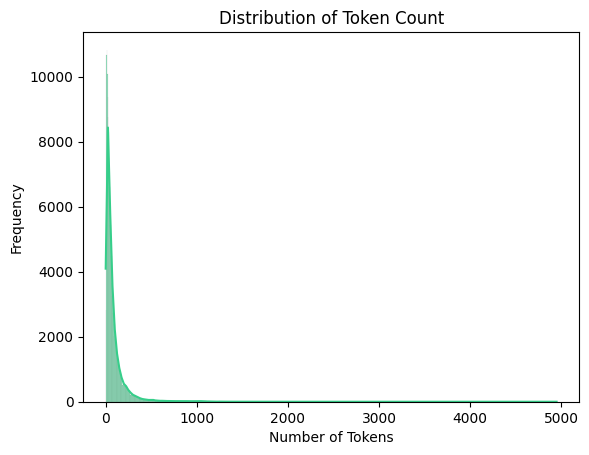

In [21]:
sns.histplot(dataframe_import["token_count"], kde=True, bins=1000)

plt.title("Distribution of Token Count")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

We could see that the distribution of the data its skew to the left side, so we will try to view from the numbers below 1000 to undestand the distribution better.

In [22]:
# Calculate counts for each token range
count_1_10 = dataframe_import["token_count"][(dataframe_import["token_count"] >= 1) & (dataframe_import["token_count"] <= 10)].count()
count_11_50 = dataframe_import["token_count"][(dataframe_import["token_count"] >= 11) & (dataframe_import["token_count"] <= 50)].count()
count_51_100 = dataframe_import["token_count"][(dataframe_import["token_count"] >= 51) & (dataframe_import["token_count"] <= 100)].count()
count_101_256 = dataframe_import["token_count"][(dataframe_import["token_count"] >= 101) & (dataframe_import["token_count"] <= 256)].count()
count_257_512 = dataframe_import["token_count"][(dataframe_import["token_count"] >= 257) & (dataframe_import["token_count"] <= 512)].count()
count_513_999 = dataframe_import["token_count"][(dataframe_import["token_count"] >= 513) & (dataframe_import["token_count"] <= 999)].count()
count_above_1000 = dataframe_import["token_count"][dataframe_import["token_count"] > 1000].count()

# Calculate total number of rows for percentages
total_count = dataframe_import["token_count"].count()

# Calculate percentages for each range
percent_1_10 = (count_1_10 / total_count) * 100
percent_11_50 = (count_11_50 / total_count) * 100
percent_51_100 = (count_51_100 / total_count) * 100
percent_101_256 = (count_101_256 / total_count) * 100
percent_257_512 = (count_257_512 / total_count) * 100
percent_513_999 = (count_513_999 / total_count) * 100
percent_above_1000 = (count_above_1000 / total_count) * 100

# Display the counts and percentages
print(f"Count of token counts from 1 to 10: {count_1_10} ({percent_1_10:.2f}%)")
print(f"Count of token counts from 11 to 50: {count_11_50} ({percent_11_50:.2f}%)")
print(f"Count of token counts from 51 to 100: {count_51_100} ({percent_51_100:.2f}%)")
print(f"Count of token counts from 101 to 256: {count_101_256} ({percent_101_256:.2f}%)")
print(f"Count of token counts from 257 to 512: {count_257_512} ({percent_257_512:.2f}%)")
print(f"Count of token counts from 513 to 999: {count_513_999} ({percent_513_999:.2f}%)")
print(f"Count of token counts above 1000: {count_above_1000} ({percent_above_1000:.2f}%)")


Count of token counts from 1 to 10: 11164 (7.23%)
Count of token counts from 11 to 50: 68456 (44.34%)
Count of token counts from 51 to 100: 37256 (24.13%)
Count of token counts from 101 to 256: 27914 (18.08%)
Count of token counts from 257 to 512: 6740 (4.37%)
Count of token counts from 513 to 999: 2284 (1.48%)
Count of token counts above 1000: 580 (0.38%)


In this case we will be droping all the values that are above 256 that its less then 5% to its not significant, in that way we can had a faster training model.

In [23]:
print(f"print before the reduction {dataframe_import.shape}")
df_export = dataframe_import.copy()
df_export = df_export[(df_export["token_count"] >= 1) & (df_export["token_count"] <= 256)]
df_export = df_export.drop(columns=["token_count"])
print(f"print after the reduction {df_export.shape}")

URL_export_path = "/content/drive/MyDrive/Code/Data_science_Turing_college/Colabs/14_002_NLP/dataset/clean_dataset.csv"
df_export.to_csv(URL_export_path, index=False)

print before the reduction (154401, 8)
print after the reduction (144790, 7)


# Distribution of the tokens
We will try to plot the distribution of the tokens to understand whats happening in the all of them.

In [24]:

def plot_distribution_tokens_per_word(model_tokenizer: PreTrainedTokenizer, data_series: pd.Series, number_words: int = 20 ) -> List:
    """Tokenize and plot the distributions of the charts"""
    tokens = []
    for text in data_series:
        encoded = model_tokenizer.encode(text, add_special_tokens=True)  # Encode and add special tokens
        tokens.extend(model_tokenizer.convert_ids_to_tokens(encoded))     # Convert IDs to tokens

    # Count the distribution of tokens
    token_counts = pd.Series(tokens).value_counts()
    token_counts = token_counts.head(number_words)

    # Plot the token distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=token_counts.index, y=token_counts.values)
    plt.title('Token Distribution')
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    return tokens

Token indices sequence length is longer than the specified maximum sequence length for this model (633 > 512). Running this sequence through the model will result in indexing errors


Repetition of each token


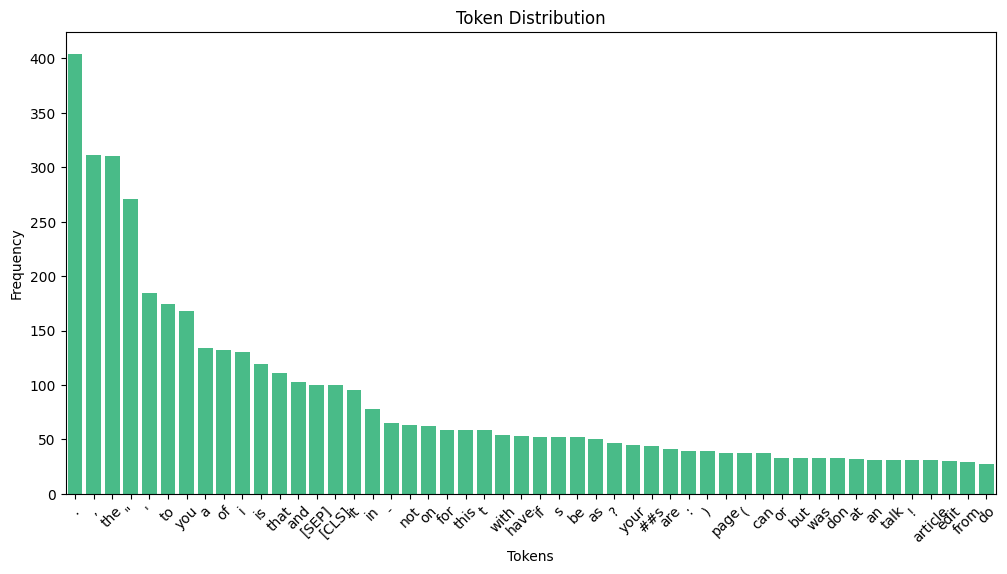

In [25]:
print("Repetition of each token")
tokens_bert =  plot_distribution_tokens_per_word(model_tokenizer= tokenizer_bert, data_series = dataframe_import["comment_text"].head(100), number_words= 50 )

# Plot the  tokens

In this part we will be extracting the values of each token

In [26]:
data = dataframe_import["comment_text"]

# Lists to store results
original_tokens = []
input_ids = []
attention_masks = []
token_type_ids = []

# Tokenize each text and capture original tokens
for text in data:
    # Tokenize and encode the text
    inputs = tokenizer_bert.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,                   # Set max length for padding/truncation
        padding='max_length',              # Pad to max_length
        truncation=True,                   # Truncate if text exceeds max_length
        return_attention_mask=True,        # Return attention mask
        return_token_type_ids=True         # Return token type IDs
    )

    # Get the original tokens
    tokens = tokenizer_bert.tokenize(text)
    original_tokens.append(tokens)

    # Append encoded results to respective lists
    input_ids.append(inputs['input_ids'])
    attention_masks.append(inputs['attention_mask'])
    token_type_ids.append(inputs['token_type_ids'])

# Optionally, convert lists to tensors if you need to input them into a model
input_ids = torch.tensor(input_ids)
attention_masks = torch.tensor(attention_masks)
token_type_ids = torch.tensor(token_type_ids)

In [27]:
original_tokens

attention_masks
token_type_ids
input_ids.unique()

tensor([    0,   100,   101,  ..., 30261, 30263, 30265])

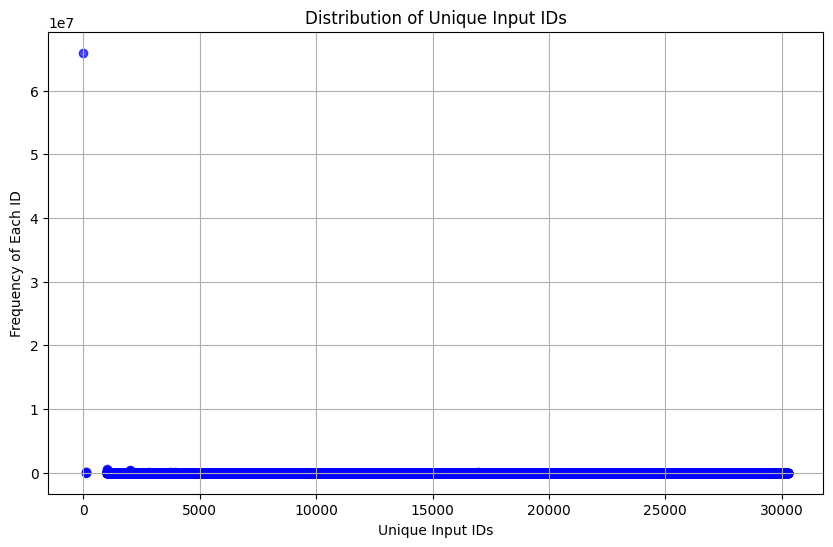

In [28]:
# Flatten the tensor to 1D and get unique values and their counts
unique_values, counts = torch.unique(input_ids, return_counts=True)

# Convert to numpy for easier plotting
unique_values_np = unique_values.numpy()
counts_np = counts.numpy()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(unique_values_np, counts_np, color='blue', alpha=0.7)
plt.title("Distribution of Unique Input IDs")
plt.xlabel("Unique Input IDs")
plt.ylabel("Frequency of Each ID")
plt.grid(True)
plt.show()

#  Word embedding

In [29]:
# Assuming `dataframe_import`, `tokenizer_bert`, and `model_bert` are defined
df_toxic = dataframe_import[dataframe_import["toxic"] == 1].head(1)
df_non_toxic = dataframe_import[dataframe_import["toxic"] == 0].head(1)

df_join = pd.concat([df_toxic, df_non_toxic])
df_join = df_join["comment_text"].tolist()

# Extract the tokens from the model
inputs = tokenizer_bert(df_join, return_tensors="pt", truncation=True, padding=True)

# Extract BERT embeddings
with torch.no_grad():
    outputs = model_bert(**inputs)
    hidden_states = outputs.last_hidden_state  # Shape: (batch_size, seq_len, hidden_size)

# Initialize lists to collect filtered tokens and embeddings
filtered_embeddings = []
filtered_tokens = []

# Iterate over all sentences
for sentence_index in range(hidden_states.size(0)):  # Loop through each sentence in the batch
    token_embeddings = hidden_states[sentence_index].numpy()  # Get embeddings for the current sentence
    tokens = tokenizer_bert.convert_ids_to_tokens(inputs["input_ids"][sentence_index])  # Tokens for the current sentence

    # Filter out special tokens ([PAD], [CLS], [SEP])
    for token, embedding in zip(tokens, token_embeddings):
        if token not in ["[PAD]", "[CLS]", "[SEP]"]:  # Exclude special tokens
            filtered_tokens.append(token)
            filtered_embeddings.append(embedding)

# Convert filtered embeddings to numpy array for PCA
filtered_embeddings = np.array(filtered_embeddings)

# Perform PCA to reduce dimensions to 3D for visualization
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(filtered_embeddings)

# Apply log scale to the third component (for coloring purposes)
log_color_scale = np.log(reduced_embeddings[:, 2] - np.min(reduced_embeddings[:, 2]) + 1)

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    z=reduced_embeddings[:, 2],
    mode='markers+text',
    text=filtered_tokens,  # Display tokens as text labels
    marker=dict(
        size=5,
        color=log_color_scale,  # Use the log-transformed scale for color
        colorscale='Viridis',  # Color scale
        opacity=0.8
    )
)])

# Set plot titles and labels
fig.update_layout(
    title="3D PCA of Token Embeddings with Log Scale for Color",
    scene=dict(
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        zaxis_title="PCA Component 3"
    )
)

# Show the plot
fig.show()


We can observe that the semantic values of words, numbers, and punctuation are represented differently in the embedding space, suggesting distinct groups based on their roles. Additionally, words like "since" and "from" appear close to each other, likely due to their shared connection to concepts of time or origin. This kind of clustering indicates that BERT captures subtle relationships between words with similar meanings or functions, and similar patterns can be seen with other words as well.

# TSNE for vizualization the word embedings

We selected 5 toxic comments and 10 non-toxic comments to determine if we could visualize any differences between them.

In [31]:
from sklearn.manifold import TSNE
# Convert df_comments to a list of strings
df_toxic = dataframe_import[dataframe_import["toxic"] == 1].head(5)
df_non_toxic = dataframe_import[dataframe_import["toxic"] == 0].head(5)

df_join = pd.concat([df_toxic, df_non_toxic])
df_join = df_join["comment_text"].tolist()

# Tokenize input
inputs = tokenizer_bert(df_join, return_tensors="pt", padding=True, truncation=True)

# Extract BERT embeddings
with torch.no_grad():
    outputs = model_bert(**inputs)
    hidden_states = outputs.last_hidden_state

# Convert to numpy array for t-SNE
# Taking the mean across tokens for each sentence, resulting in shape: [num_sentences, hidden_dim]
sentence_embeddings = hidden_states.mean(dim=1).cpu().numpy()

# Use t-SNE to reduce to 3 dimensions with a lower perplexity
tsne = TSNE(n_components=3, random_state=42, perplexity=5)
embeddings_3d = tsne.fit_transform(sentence_embeddings)

# Create a 3D scatter plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=embeddings_3d[:, 0],
    y=embeddings_3d[:, 1],
    z=embeddings_3d[:, 2],
    mode='markers+text',
    marker=dict(size=6, color='blue', opacity=0.8),
    text=[f"Comment {i+1}" for i in range(len(df_join))],
    textposition="top center"
)])

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    title="3D t-SNE visualization of BERT sentence embeddings"
)

# Show the plot
fig.show()


From this chart, we observe that the non-toxic comments, specifically those numbered 6 to 10, are clustered in the central area of the plot. In contrast, the toxic comments are positioned towards the edges. This pattern suggests a potential connection that we can further explore through this visualization.

---
# Conclusions
- We analyzed approximately 28,000 tokens containing a variety of words.
- In most target variables, we identified several challenging words related to the context of the issue. However, we also encountered many anomalous tokens, such as the word "Wikipedia."
- We observed some unusual characters that appeared to be from other languages. However, our analysis indicated that many of these had already been translated, and the primary comments were predominantly written in English.
- By employing PCA and t-SNE, we found that certain words and sentences could be classified and grouped in specific areas. Despite the higher dimensionality of the data, these techniques helped us identify connections between related words.



---